In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

In [7]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url)
#print(ds)
#ds

# select period
#ds = ds.sel(time=slice('1960', '2018'))
#ds

#actually load the data
ds.load()

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2019, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-03-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
    sst        (time, lat, lon) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan nan
Attributes: (12/38)
    climatology:                     Climatology is based on 1971-2000 SST, X...
    description:                     In situ data: ICOADS2.5 before 2007 and ...
    keywords_vocabulary:             NASA Global Change Master Directory (GCM...
    keywords:                        Earth Science > Oceans > Ocean Temperatu...
    instrument:                      Conventional thermometers
    source_comment:                  SSTs were observed by conventional therm...
    ...                              ...
    license:                         No constraints on data access or use
    comment:                         SSTs were observed by conventional therm...
    summary:                         ERSST.v5 is developed based on v4 after ...
    dataset_title:                   NOAA Extended Reconstructed SST V5
    data_modified:                   2022-04-07
    DODS_EXTRA.Unlimited_Dimension:  time

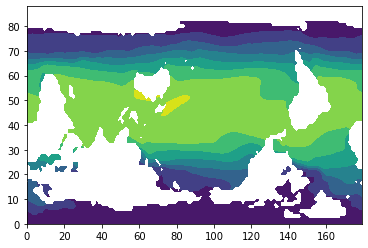

In [9]:
plt.contourf(ds['sst'][-1,:,:])

In [11]:
ds=ds.reindex(lat=list(reversed(ds['lat'])))

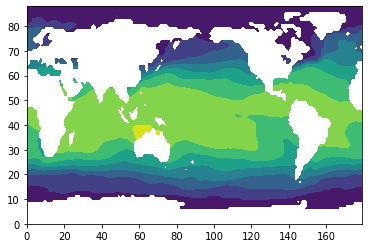

In [13]:
plt.contourf(ds['sst'][0,:,:])

Text(0.5, 1.0, 'Pacific Sea surface Temperature (K)')

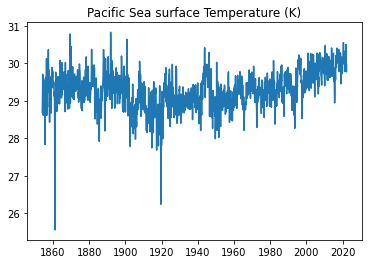

In [15]:
ds_pt=ds.sel(lat=0,lon=150,method='nearest')
plt.plot(ds_pt['time'],ds_pt['sst'])
plt.title('Pacific Sea surface Temperature (K)')

In [17]:
ds_climo=ds.groupby('time.month').mean(dim='time')
ds_climo

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, month: 12, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -88.0 -86.0 -84.0 -82.0 ... 82.0 84.0 86.0 88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (month, nbnds) float64 9.969e+36 9.969e+36 ... 9.969e+36
    sst        (month, lat, lon) float32 nan nan nan nan ... -1.8 -1.8 -1.8 -1.8

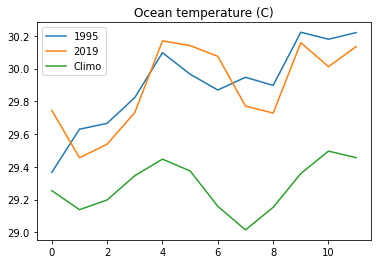

In [18]:
ds_ptclimo=ds_climo.sel(lat=0,lon=150,method='nearest')
ds_pt1995=ds_pt.sel(time=slice('1995-01-01','1995-12-31'))
ds_pt2019=ds_pt.sel(time=slice('2019-01-01','2019-12-31'))
                    
plt.plot(ds_pt1995['sst'])
plt.plot(ds_pt2019['sst'])                    
plt.plot(ds_ptclimo['sst'])
plt.title('Ocean temperature (C)')
plt.legend(['1995','2019','Climo'])

In [19]:
ds_anoms=ds.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2019, nbnds: 2)
Coordinates:
  * lat        (lat) float32 -88.0 -86.0 -84.0 -82.0 ... 82.0 84.0 86.0 88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2022-03-01
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 5 6 7 8 9 10 11 12 1 2 3
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sst        (time, lat, lon) float32 nan nan nan ... -1.192e-07 -1.192e-07

Text(0.5, 1.0, 'Ocean Temperature Anomalies (C)')

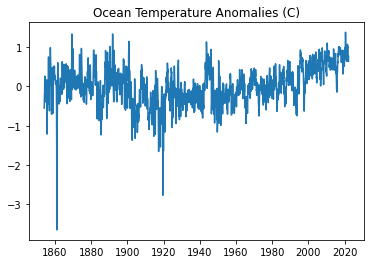

In [20]:
ds_anomspt=ds_anoms.sel(lat=0,lon=150,method='nearest')
plt.plot(ds_anomspt['time'],ds_anomspt['sst'])
plt.title('Ocean Temperature Anomalies (C)')